<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork/images/IDSN-logo.png" width="300" alt="cognitiveclass.ai logo">

<h1 align="center"><font size="5">AUTOENCODERS</font></h1>


Estimated time needed: **25** minutes


<div class="alert alert-block alert-info" style="margin-top: 20px">
Welcome to this notebook about autoencoders.
<font size="3"><strong>In this notebook you will learn the definition of an autoencoder, how it works, and see an implementation in TensorFlow.</strong></font>
<br>
<br>
<h2>Table of Contents</h2>
<ol>
 <li><a href="#ref1">Introduction</a></li>
 <li><a href="#ref2">Feature Extraction and Dimensionality Reduction</a></li>
 <li><a href="#ref3">Autoencoder Structure</a></li>
 <li><a href="#ref4">Performance</a></li>
 <li><a href="#ref5">Training: Loss Function</a></li>
 <li><a href="#ref6">Code</a></li>
</ol>
</div>
<br>
By the end of this notebook, you should be able to create simple autoencoders apply them to problems in the field of unsupervised learning.
<br>
<p></p>
<hr>


<a id="ref1"></a>

<h2>Introduction</h2>
An autoencoder, also known as autoassociator or Diabolo networks, is an artificial neural network employed to recreate the given input.
It takes a set of <b>unlabeled</b> inputs, encodes them and then tries to extract the most valuable information from them.
They are used for feature extraction, learning generative models of data, dimensionality reduction and can be used for compression. 

A 2006 paper named <b><a href="https://www.cs.toronto.edu/~hinton/science.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01">Reducing the Dimensionality of Data with Neural Networks</a>, done by G. E. Hinton and R. R. Salakhutdinov</b>, showed better results than years of refining other types of network, and was a breakthrough in the field of Neural Networks, a field that was "stagnant" for 10 years.

Now, autoencoders, based on Restricted Boltzmann Machines, are employed in some of the largest deep learning applications. They are the building blocks of Deep Belief Networks (DBN).

<center><img src="https://ibm.box.com/shared/static/xlkv9v7xzxhjww681dq3h1pydxcm4ktp.png" style="width: 350px;"></center>


<hr>


<a id="ref2"></a>

<h2>Feature Extraction and Dimensionality Reduction</h2>

An example given by Nikhil Buduma in KdNuggets (<a href="http://www.kdnuggets.com/2015/03/deep-learning-curse-dimensionality-autoencoders.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01">link</a>) gives an excellent explanation of the utility of this type of Neural Network.

Say that you want to extract the emotion that a person in a photograph is feeling. Take the following 256x256 pixel grayscale picture as an example:

<img src="https://ibm.box.com/shared/static/r5knpow4bk2farlvxia71e9jp2f2u126.png">

If we just use the raw image, we have too many dimensions to analyze.  This image is 256x256 pixels, which corresponds to an input vector of 65536 dimensions! Conventional cell phones can produce images in the  4000 x 3000 pixels range, which gives us 12 million dimensions to analyze.

This is particularly problematic, since the difficulty of a machine learning problem is vastly increased as more dimensions are involved. According to a 1982 study by C.J. Stone (<a href="http://www-personal.umich.edu/~jizhu/jizhu/wuke/Stone-AoS82.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01">link</a>), the time to fit a model, is optimal if:

<br><br>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3><strong>$$m^{-p/(2p+d)}$$</strong></h3>
<br>
Where:
<br>
m: Number of data points
<br>
d: Dimensionality of the data
<br>
p: Number of Parameters in the model
</div>

As you can see, it increases exponentially!

Returning to our example, we don't need to use all of the 65,536 dimensions to classify an emotion.
A human identifies emotions according to specific facial expressions, and some <b>key features</b>, like the shape of the mouth and eyebrows.

<center><img src="https://ibm.box.com/shared/static/m8urvuqujkt2vt1ru1fnslzh24pv7hn4.png" height="256" width="256"></center>


<hr>


<a id="ref3"></a>

<h2>Autoencoder Structure</h2>

<img src="https://ibm.box.com/shared/static/no7omt2jhqvv7uuls7ihnzikyl9ysnfp.png" style="width: 400px;">

An autoencoder can be divided in two parts, the <b>encoder</b> and the <b>decoder</b>.

The encoder needs to compress the representation of an input. In this case, we are going to reduce the dimensions of the image of the example face from 2000 dimensions to only 30 dimensions.  We will acomplish this by running the data through the layers of our encoder.

The decoder works like encoder network in reverse. It works to recreate the input as closely as possible.  The training procedure produces at the center of the network a compressed, low dimensional representation that can be decoded to obtain the higher dimensional representation with minimal loss of information between the input and the output.


<hr>


<a id="ref4"></a>

<h2>Performance</h2>

After training has been completed, you can use the encoded data as a reliable low dimensional representation of the data.  This can be applied to many problems where dimensionality reduction seems appropriate.

<img src="https://ibm.box.com/shared/static/yt3xyon4g2jyw1w9qup1mvx7cgh28l64.png">

This image was extracted from the G. E. Hinton and R. R. Salakhutdinovcomparing's <a href="https://www.cs.toronto.edu/~hinton/science.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01">paper</a>, on the two-dimensional reduction for 500 digits of the MNIST, with PCA (Principal Component Analysis) on the left and autoencoder on the right. We can see that the autoencoder provided us with a better separation of data.


<hr>


<a id="ref5"></a>

<h2>Training: Loss function</h2>

An autoencoder uses the <b>Loss</b> function to properly train the network. The Loss function will calculate the differences between our output and the expected results. After that, we can minimize this error with gradient descent. There are many types of Loss functions, and it is important to consider the type of problem (classification, regression, etc.) when choosing this funtion.


<h3>Binary Values:</h3>
$$L(W) = - \sum_{k} (x_k log(\hat{x}_k) + (1 - x_k) \log (1 - \hat{x}_k) \ )$$


For binary values, we can use an equation based on the sum of Bernoulli's cross-entropy.  This loss function is best for binary classification problems.

$x_k$ is one of our inputs and $\hat{x}_k$ is the respective output.  Note that:

$$\hat{x} = f(x,W)$$

where $W$ is the full parameter set of the neural network.

We use this function so that when $x_k=1$, we want the calculated value of $\hat{x}_k$ to be very close to one, and likewise if $x_k=0$.

If the value is one, we just need to calculate the first part of the formula, that is, $-x_k log(\hat{x}_k)$. Which, turns out to just calculate $- log(\hat{x}_k)$.  We explicitly exclude the second term to avoid numerical difficulties when computing the logarithm of very small numbers.

Likewise, if the value is zero, we need to calculate just the second part, $(1 - x_k) \log (1 - \hat{x}_k))$ - which turns out to be $log (1 - \hat{x}_k) $.


<h3>Real values:</h3>
$$L(W) = - \frac{1}{2}\sum_{k} (\hat{x}_k- x_k \ )^2$$


For data where the value (not category) is important to reproduce, we can use the sum of squared errors (SSE) for our Loss function. This function is usually used in regressions.

As it was with the above example, $x_k$ is one of our inputs and $\hat{x}_k$ is the respective output, and we want to make our output as similar as possible to our input.


<h3>Computing Gradient</h3>

The gradient of the loss function is an important and complex function.  It is defined as:
    $$\nabla_{W} L(W)_j = \frac{\partial f(x,W)}{\partial{W_j}}$$

Fortunately for us, TensorFlow computes these complex functions automatically when we define our functions that are used to compute loss!  They automatically manage the backpropagation algorithm, which is an efficient way of computing the gradients in complex neural networks.


<hr>


<a id="ref6"></a>

<h2>Code</h2>

 We are going to use the MNIST dataset for our example.
The following code was created by Aymeric Damien. You can find some of his code in <a href="https://github.com/aymericdamien">here</a>. We made some modifications which allow us to import the datasets to Jupyter Notebooks.


Let's call our imports and make the MNIST data available to use.


In [1]:
!pip install tensorflow==2.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 903.3 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 88.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 54.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 76.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 99.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 75.4 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 66.3 MB/s eta 0

In [1]:
#from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

if not tf.__version__ == '2.9.0':
    print(tf.__version__)
    raise ValueError('please upgrade to TensorFlow 2.9.0, or restart your Kernel (Kernel->Restart & Clear Output)')



2024-05-23 22:25:52.727775: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-23 22:25:52.735508: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-23 22:25:52.735541: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Import MINST data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [4]:
y_train = y_train.astype('float32') / 255.
y_test = y_test.astype('float32') / 255.

In [5]:
x_image_train = tf.reshape(x_train, [-1,28,28,1])  
x_image_train = tf.cast(x_image_train, 'float32') 

x_image_test = tf.reshape(x_test, [-1,28,28,1]) 
x_image_test = tf.cast(x_image_test, 'float32') 

2024-05-23 22:25:56.852761: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-05-23 22:25:56.852821: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-23 22:25:56.852859: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyterlab-shamesyazzie): /proc/driver/nvidia/version does not exist
2024-05-23 22:25:56.853262: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


We use the tf.keras.layers.Flatten() function to prepare the training data to be compatible with the encoding and decoding layer


In [6]:
print(x_train.shape)

(60000, 28, 28)


In [7]:
flatten_layer = tf.keras.layers.Flatten()
x_train = flatten_layer(x_train)

Notice how the <code>x_train.shape</code>  changes from (60000,28,28) to (60000, 784)


In [8]:
print(x_train.shape)

(60000, 784)


Now, let's give the parameters that are going to be used by our NN.


In [9]:
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10
global_step = tf.Variable(0)
total_batch = int(len(x_train) / batch_size)

# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
encoding_layer = 32 # final encoding bottleneck features
n_input = 784 # MNIST data input (img shape: 28*28)



<h3> encoder </h3>
Now we need to create our encoder. For this, we are going to use tf.keras.layers.Dense with sigmoidal activation functions. Sigmoidal functions delivers great results with this type of network. This is due to having a good derivative that is well-suited to backpropagation. We can create our encoder using the sigmoidal function like this:


In [10]:

enocoding_1 = tf.keras.layers.Dense(n_hidden_1, activation=tf.nn.sigmoid)
encoding_2 = tf.keras.layers.Dense(n_hidden_2, activation=tf.nn.sigmoid)
encoding_final = tf.keras.layers.Dense(encoding_layer, activation=tf.nn.relu)

# Building the encoder
def encoder(x):
    x_reshaped = flatten_layer(x)
    # Encoder first layer with sigmoid activation #1
    layer_1 = enocoding_1(x_reshaped)
    # Encoder second layer with sigmoid activation #2
    layer_2 = encoding_2(layer_1)
    code = encoding_final(layer_2)
    return code

<h3> decoder </h3>

You can see that the layer_1 in the encoder is the layer_2 in the decoder and vice-versa.


In [11]:
decoding_1 = tf.keras.layers.Dense(n_hidden_2, activation=tf.nn.sigmoid)
decoding_2 = tf.keras.layers.Dense(n_hidden_1, activation=tf.nn.sigmoid)
decoding_final = tf.keras.layers.Dense(n_input)
# Building the decoder
def decoder(x):
    # Decoder first layer with sigmoid activation #1
    layer_1 = decoding_1(x)
    # Decoder second layer with sigmoid activation #2
    layer_2 = decoding_2(layer_1)
    decode = self.decoding_final(layer_2)
    return decode

Let's construct our model.
We  define a <code>cost</code> function to calculate the loss  and a <code>grad</code> function to calculate gradients that will be used in backpropagation.


In [12]:
class AutoEncoder(tf.keras.Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.n_hidden_1 = n_hidden_1 # 1st layer num features
        self.n_hidden_2 = n_hidden_2 # 2nd layer num features
        self.encoding_layer = encoding_layer
        self.n_input = n_input # MNIST data input (img shape: 28*28)

        self.flatten_layer = tf.keras.layers.Flatten()
        self.enocoding_1 = tf.keras.layers.Dense(self.n_hidden_1, activation=tf.nn.sigmoid)
        self.encoding_2 = tf.keras.layers.Dense(self.n_hidden_2, activation=tf.nn.sigmoid)
        self.encoding_final = tf.keras.layers.Dense(self.encoding_layer, activation=tf.nn.relu)
        self.decoding_1 = tf.keras.layers.Dense(self.n_hidden_2, activation=tf.nn.sigmoid)
        self.decoding_2 = tf.keras.layers.Dense(self.n_hidden_1, activation=tf.nn.sigmoid)
        self.decoding_final = tf.keras.layers.Dense(self.n_input)


    # Building the encoder
    def encoder(self,x):
        #x = self.flatten_layer(x)
        layer_1 = self.enocoding_1(x)
        layer_2 = self.encoding_2(layer_1)
        code = self.encoding_final(layer_2)
        return code
        

    # Building the decoder
    def decoder(self, x):
        layer_1 = self.decoding_1(x)
        layer_2 = self.decoding_2(layer_1)
        decode = self.decoding_final(layer_2)
        return decode

        
    def call(self, x):
        encoder_op  = self.encoder(x)
        # Reconstructed Images
        y_pred = self.decoder(encoder_op)
        return y_pred
        
def cost(y_true, y_pred):
    loss = tf.losses.mean_squared_error(y_true, y_pred)
    cost = tf.reduce_mean(loss)
    return cost

def grad(model, inputs, targets):
    #print('shape of inputs : ',inputs.shape)
    #targets = flatten_layer(targets)
    with tf.GradientTape() as tape:    
        reconstruction = model(inputs)
        loss_value = cost(targets, reconstruction)
    return loss_value, tape.gradient(loss_value, model.trainable_variables),reconstruction

For training we will run for 20 epochs.


In [13]:
model = AutoEncoder()
optimizer = tf.keras.optimizers.RMSprop(learning_rate)

for epoch in range(training_epochs):
    for i in range(total_batch):
        x_inp = x_train[i : i + batch_size]
        loss_value, grads, reconstruction = grad(model, x_inp, x_inp)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1),
              "cost=", "{:.9f}".format(loss_value))

print("Optimization Finished!")

Epoch: 0001 cost= 0.045896832
Epoch: 0002 cost= 0.031597495
Epoch: 0003 cost= 0.024872281
Epoch: 0004 cost= 0.020709697
Epoch: 0005 cost= 0.016551614
Epoch: 0006 cost= 0.014649119
Epoch: 0007 cost= 0.012362391
Epoch: 0008 cost= 0.010824669
Epoch: 0009 cost= 0.009759938
Epoch: 0010 cost= 0.008611128
Epoch: 0011 cost= 0.007509122
Epoch: 0012 cost= 0.007063667
Epoch: 0013 cost= 0.006440215
Epoch: 0014 cost= 0.006340591
Epoch: 0015 cost= 0.005771446
Epoch: 0016 cost= 0.005282902
Epoch: 0017 cost= 0.005468814
Epoch: 0018 cost= 0.004781921
Epoch: 0019 cost= 0.005013058
Epoch: 0020 cost= 0.004733221
Optimization Finished!


Now, let's apply encoder and decoder for our tests.


In [14]:
# Applying encode and decode over test set
encode_decode = model(flatten_layer(x_image_test[:examples_to_show]))

Let's simply visualize our graphs!


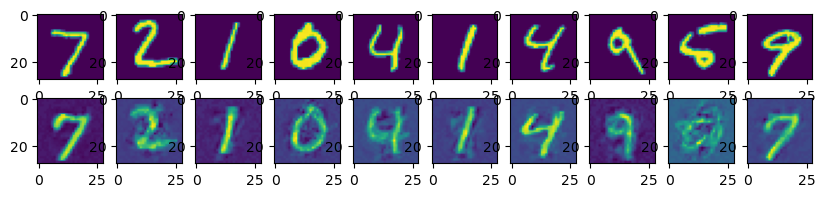

In [15]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(x_image_test[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))

As you can see, the reconstructions were successful. It can be seen that some noise were added to the image.


<hr>


## Want to learn more?

Also, you can use **Watson Studio** to run these notebooks faster with bigger datasets.**Watson Studio** is IBM’s leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, **Watson Studio** enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of **Watson Studio** users today with a free account at [Watson Studio](https://cocl.us/ML0120EN_DSX).This is the end of this lesson. Thank you for reading this notebook, and good luck on your studies.


### Thanks for completing this lesson!


Created by <a href="https://www.linkedin.com/in/franciscomagioli?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01">Francisco Magioli</a>, <a href="https://ca.linkedin.com/in/erich-natsubori-sato?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01">Erich Natsubori Sato</a>, <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01">Saeed Aghabozorgi</a>

Updated to TF 2.X by  <a href="https://www.linkedin.com/in/samaya-madhavan?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01"> Samaya Madhavan </a>


### References:

-   [https://en.wikipedia.org/wiki/Autoencoder](https://en.wikipedia.org/wiki/Autoencoder?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)
-   [http://ufldl.stanford.edu/tutorial/unsupervised/Autoencoders/](http://ufldl.stanford.edu/tutorial/unsupervised/Autoencoders?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)
-   [http://www.slideshare.net/billlangjun/simple-introduction-to-autoencoder](http://www.slideshare.net/billlangjun/simple-introduction-to-autoencoder?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)
-   [http://www.slideshare.net/danieljohnlewis/piotr-mirowski-review-autoencoders-deep-learning-ciuuk14](http://www.slideshare.net/danieljohnlewis/piotr-mirowski-review-autoencoders-deep-learning-ciuuk14?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)
-   [https://cs.stanford.edu/~quocle/tutorial2.pdf](https://cs.stanford.edu/~quocle/tutorial2.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)
-   <https://gist.github.com/hussius/1534135a419bb0b957b9>
-   [http://www.deeplearningbook.org/contents/autoencoders.html](http://www.deeplearningbook.org/contents/autoencoders.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)
-   [http://www.kdnuggets.com/2015/03/deep-learning-curse-dimensionality-autoencoders.html/](http://www.kdnuggets.com/2015/03/deep-learning-curse-dimensionality-autoencoders.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)
-   [https://www.youtube.com/watch?v=xTU79Zs4XKY](https://www.youtube.com/watch?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01&v=xTU79Zs4XKY&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)
-   [http://www-personal.umich.edu/~jizhu/jizhu/wuke/Stone-AoS82.pdf](http://www-personal.umich.edu/~jizhu/jizhu/wuke/Stone-AoS82.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)


<hr>

Copyright © 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
